In [36]:
#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [58]:
p=-5

def func(y1,
         y2,
         e):

    return - (2*y2)/e + y1**p

def monte_carlo(func,
                y1,
                y2,
                a,
                b,
                n=10**6):
    """
    Monte Carlo integration
    """
    
    u = np.random.uniform(size=n)

    u_func = func( y1 = y1, y2 = y2, e = a + (b-a)*u )

    s = ((b-a)/n)*u_func.sum()
    
    return s

In [60]:
e1 = e2 = 0.0

deltaE=0.001

monte_go=True

y1=1
y2=0

list_y1=[1]
list_e=[0]

while monte_go:
        
    e2 = e2 + deltaE

    y2 = y2 + monte_carlo(func,
                          y1,
                          y2,
                          a=e1,
                          b=e2)

    y1 = y1 + deltaE*y2

    e1=e2

    list_y1.append(y1)
    list_e.append(e2)

    print(y1,e2)


    if y1 < 0:

        monte_go=False

1.000001 0.001
1.000001613870587 0.002
1.0000027299339531 0.003
1.0000042038140957 0.004
1.0000060198686969 0.005
1.0000081735954225 0.006
1.0000106632368964 0.007
1.0000134878486397 0.008
1.0000166468905647 0.009000000000000001
1.0000201400912023 0.010000000000000002
1.0000239671849545 0.011000000000000003
1.0000281280737895 0.012000000000000004
1.0000326225702187 0.013000000000000005
1.0000374505856588 0.014000000000000005
1.0000426120270614 0.015000000000000006
1.0000481068190166 0.016000000000000007
1.0000539349125888 0.017000000000000008
1.000060096235168 0.01800000000000001
1.0000665906964203 0.01900000000000001
1.000073418250116 0.02000000000000001
1.0000805788314486 0.02100000000000001
1.0000880723918442 0.022000000000000013
1.0000958988751416 0.023000000000000013
1.000104058222345 0.024000000000000014
1.0001125503737711 0.025000000000000015
1.0001213752584102 0.026000000000000016
1.000130532819041 0.027000000000000017
1.0001400229907527 0.028000000000000018
1.0001498457205282 

KeyboardInterrupt: 

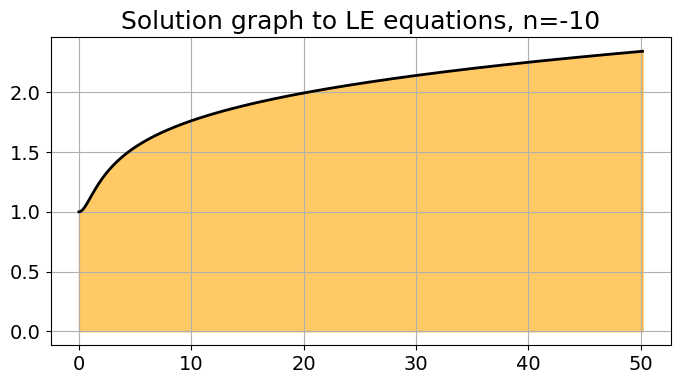

In [61]:
rect = np.linspace(0,2.4,5)
plt.figure(figsize=(8,4))
plt.title("Solution graph to LE equations, n=-10",
         fontsize=18)
plt.plot(list_e,list_y1,'-',c='k',lw=2)
plt.fill_between(list_e,y1=list_y1,y2=0,color='orange',alpha=0.6)
# for i in range(5):
#     plt.vlines(x=rect[i],ymin=0,ymax=2,color='blue')
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()